In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle
from random import sample

from utils import *

In [22]:
#selected subset of dates. 
val_dates = ['171021','171023','180711','180714']
test_dates = ['171020','171022','180712', '180713']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
#load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/'
load_path = '/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_2/'
# save_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_2_upsample'
model_saving_path = '/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_2/LR_models'
CH = 23

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=256,CH = CH)

In [23]:
len(train_loader), len(val_loader), len(test_loader)

(251, 24, 25)

In [30]:
# Balance Validation Dataset
sleep_files = []
move_files = []
for t in range(len(val_files)):
    if 'sleep' in val_files[t][0]:
        sleep_files.append(val_files[t])
    if 'move' in val_files[t][0]:
        move_files.append(val_files[t])

sleep_sample = sample(sleep_files, len(move_files))
val_2_files = sleep_sample+move_files
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_2_files, test_files,load_path, batch_size=256,CH = CH)

## Check balance
# count_sleep = 0
# count_move = 0
# for t in range(len(val_2_files)):
#     if 'sleep' in val_2_files[t][0]:
#         count_sleep+=1
#     if 'move' in val_2_files[t][0]:
#         count_move +=1 
# print(count_sleep, count_move)

In [33]:
len(train_loader), len(val_loader), len(test_loader)

(251, 7, 25)

In [31]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([256, 1, 100, 10])
torch.Size([256, 1])
256
256
256


date:180327, rec:004, time:3495.0, label:1.0
date:180325, rec:002, time:1100.0, label:0.0


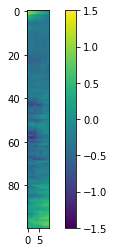

date:180327, rec:002, time:2700.0, label:1.0
date:180325, rec:005, time:544.0, label:1.0
date:180413, rec:001, time:6617.0, label:0.0


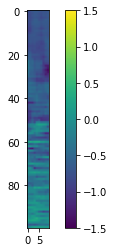

date:180413, rec:001, time:770.0, label:0.0


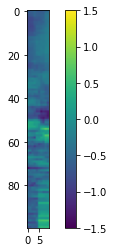

date:180331, rec:007, time:5147.0, label:0.0


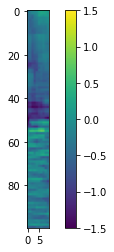

date:180413, rec:004, time:590.0, label:0.0


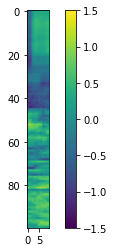

date:180324, rec:006, time:5833.0, label:1.0
date:180330, rec:001, time:920.0, label:0.0


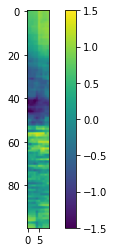

date:180409, rec:006, time:6598.0, label:0.0


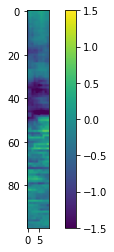

date:180331, rec:003, time:7037.0, label:1.0
date:180329, rec:001, time:710.0, label:0.0


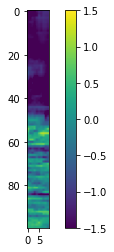

date:180413, rec:003, time:7031.0, label:0.0


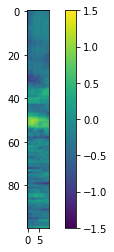

date:180324, rec:005, time:2000.0, label:1.0
date:180325, rec:003, time:3572.0, label:1.0
date:180331, rec:007, time:7088.0, label:0.0


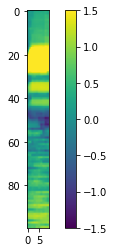

date:180413, rec:001, time:5032.0, label:0.0


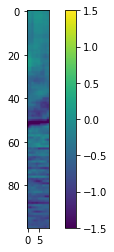

date:180410, rec:005, time:2347.0, label:1.0
date:180327, rec:002, time:6595.0, label:1.0
date:180413, rec:003, time:250.0, label:0.0


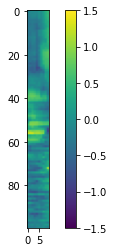

date:180329, rec:001, time:2089.0, label:1.0
date:180414, rec:004, time:5986.0, label:1.0
date:180330, rec:009, time:7011.0, label:0.0


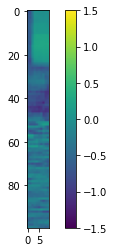

date:180331, rec:004, time:1052.0, label:1.0
date:180331, rec:003, time:3518.0, label:1.0
date:180327, rec:007, time:3750.0, label:0.0


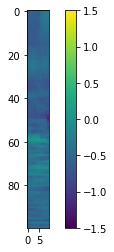

date:180410, rec:005, time:2844.0, label:1.0
date:180409, rec:006, time:2565.0, label:1.0
date:180330, rec:005, time:6122.0, label:1.0
date:180330, rec:009, time:5341.0, label:0.0


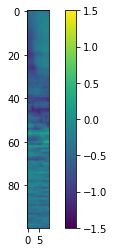

date:180401, rec:002, time:5702.0, label:1.0
date:180331, rec:007, time:3857.0, label:0.0


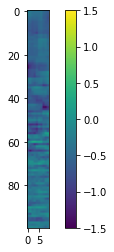

date:180322, rec:007, time:4600.0, label:0.0


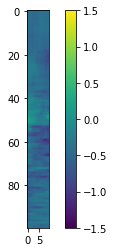

date:180413, rec:003, time:6871.0, label:0.0


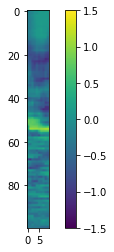

date:180413, rec:003, time:5571.0, label:0.0


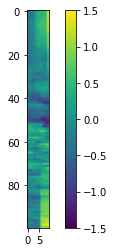

date:180322, rec:007, time:3569.0, label:0.0


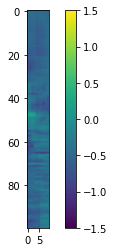

date:180325, rec:009, time:4869.0, label:0.0


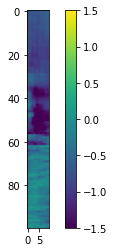

date:180324, rec:008, time:6394.0, label:0.0


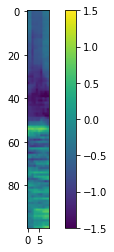

date:180413, rec:003, time:3176.0, label:0.0


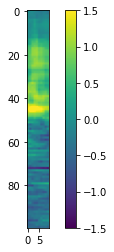

date:180329, rec:004, time:5301.0, label:1.0
date:180323, rec:001, time:250.0, label:0.0


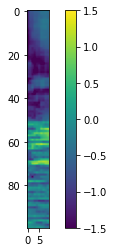

date:180413, rec:005, time:5697.0, label:1.0
date:180414, rec:007, time:2097.0, label:0.0


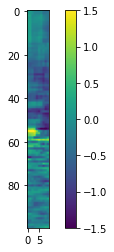

date:180413, rec:001, time:1100.0, label:0.0


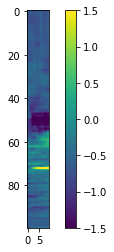

date:180411, rec:003, time:30.0, label:1.0
date:180410, rec:004, time:709.0, label:1.0
date:180413, rec:004, time:6499.0, label:1.0
date:180329, rec:004, time:6131.0, label:1.0
date:180412, rec:002, time:3647.0, label:1.0
date:180327, rec:001, time:7167.0, label:1.0
date:180327, rec:002, time:1520.0, label:1.0
date:180401, rec:002, time:3806.0, label:1.0
date:180325, rec:007, time:1174.0, label:1.0
date:180324, rec:003, time:4395.0, label:1.0
date:180325, rec:003, time:3913.0, label:1.0
date:180413, rec:001, time:4512.0, label:0.0


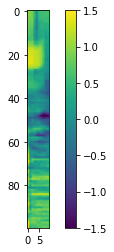

date:180414, rec:007, time:3797.0, label:0.0


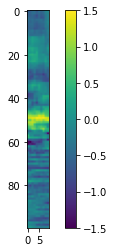

date:180330, rec:009, time:7141.0, label:0.0


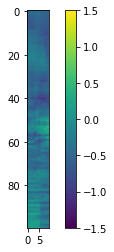

date:180323, rec:002, time:780.0, label:1.0
date:180413, rec:001, time:2180.0, label:0.0


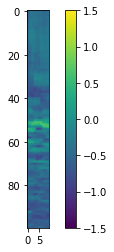

date:180413, rec:003, time:1863.0, label:0.0


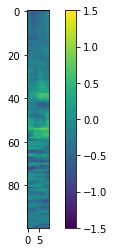

date:180325, rec:007, time:6973.0, label:0.0


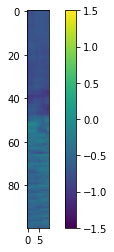

date:180325, rec:001, time:3570.0, label:1.0
date:180409, rec:006, time:793.0, label:1.0
date:180325, rec:003, time:582.0, label:1.0
date:180413, rec:003, time:4728.0, label:0.0


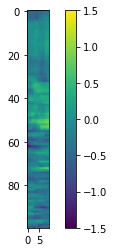

date:180401, rec:001, time:7133.0, label:1.0
date:180329, rec:001, time:4311.0, label:1.0
date:180412, rec:003, time:4096.0, label:1.0
date:180414, rec:004, time:4025.0, label:1.0
date:180330, rec:004, time:630.0, label:1.0
date:180330, rec:008, time:2556.0, label:0.0


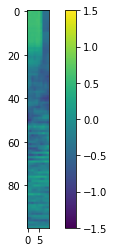

date:180327, rec:005, time:5488.0, label:0.0


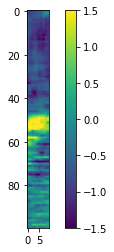

date:180414, rec:007, time:5388.0, label:0.0


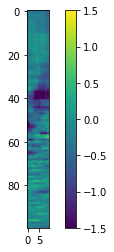

date:180412, rec:003, time:6678.0, label:1.0
date:180322, rec:003, time:290.0, label:1.0
date:180331, rec:007, time:5808.0, label:0.0


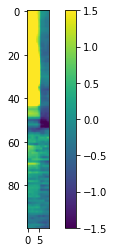

date:180413, rec:002, time:6061.0, label:0.0


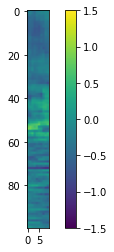

date:180325, rec:001, time:2130.0, label:0.0


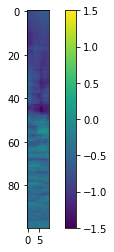

date:180324, rec:003, time:3267.0, label:1.0
date:180414, rec:007, time:2617.0, label:0.0


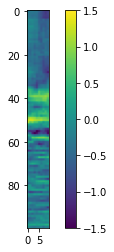

date:180329, rec:001, time:1490.0, label:0.0


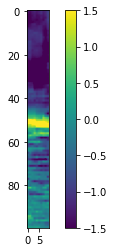

date:180413, rec:002, time:6131.0, label:0.0


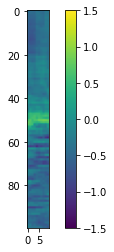

date:180327, rec:004, time:2294.0, label:0.0


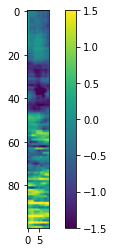

date:180330, rec:003, time:6603.0, label:1.0
date:180401, rec:001, time:6813.0, label:1.0
date:180331, rec:007, time:6358.0, label:0.0


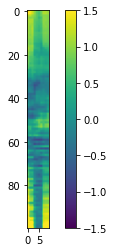

date:180413, rec:001, time:2870.0, label:0.0


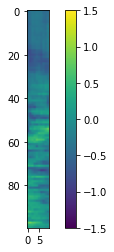

date:180412, rec:002, time:4557.0, label:1.0
date:180330, rec:008, time:6505.0, label:0.0


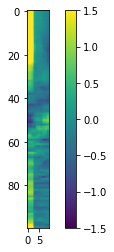

date:180411, rec:004, time:3486.0, label:1.0
date:180330, rec:006, time:4452.0, label:1.0
date:180323, rec:004, time:3213.0, label:1.0
date:180324, rec:008, time:6184.0, label:0.0


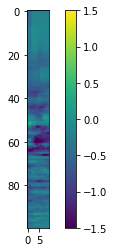

date:180329, rec:001, time:3971.0, label:1.0
date:180329, rec:003, time:5956.0, label:1.0
date:180411, rec:005, time:1440.0, label:1.0
date:180330, rec:009, time:3390.0, label:0.0


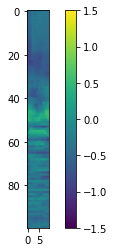

date:180325, rec:006, time:4755.0, label:1.0
date:180411, rec:004, time:2227.0, label:1.0
date:180330, rec:009, time:4441.0, label:0.0


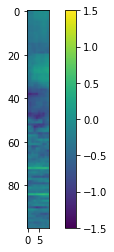

date:180409, rec:003, time:6657.0, label:1.0
date:180327, rec:001, time:6912.0, label:0.0


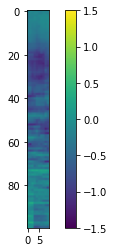

date:180330, rec:004, time:5772.0, label:1.0
date:180327, rec:008, time:5793.0, label:0.0


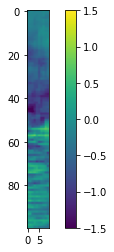

date:180414, rec:002, time:6551.0, label:1.0
date:180327, rec:007, time:1820.0, label:0.0


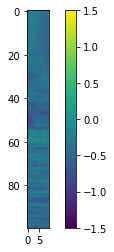

date:180414, rec:007, time:5738.0, label:0.0


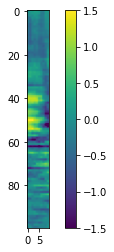

date:180324, rec:008, time:5914.0, label:0.0


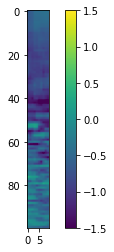

date:180327, rec:001, time:2120.0, label:0.0


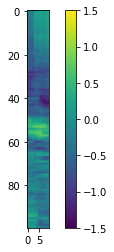

date:180330, rec:008, time:2556.0, label:0.0


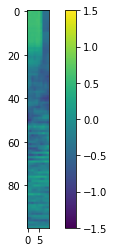

date:180329, rec:001, time:4281.0, label:1.0
date:180330, rec:008, time:3496.0, label:0.0


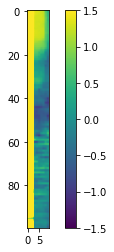

date:180331, rec:007, time:4047.0, label:0.0


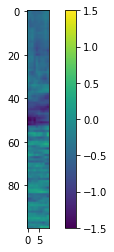

date:180411, rec:006, time:1781.0, label:1.0
date:180411, rec:006, time:5412.0, label:0.0


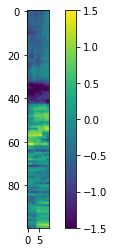

date:180325, rec:004, time:6077.0, label:1.0
date:180324, rec:003, time:1759.0, label:1.0
date:180412, rec:006, time:5258.0, label:0.0


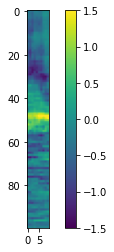

date:180327, rec:008, time:30.0, label:0.0


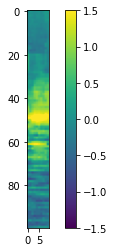

date:180329, rec:001, time:3921.0, label:1.0
date:180409, rec:003, time:2749.0, label:1.0
date:180322, rec:003, time:4977.0, label:1.0
date:180322, rec:007, time:1707.0, label:0.0


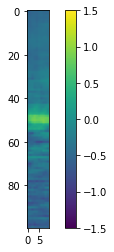

date:180413, rec:001, time:6637.0, label:0.0


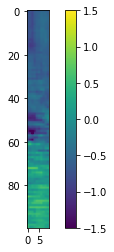

date:180409, rec:003, time:490.0, label:1.0
date:180414, rec:001, time:40.0, label:0.0


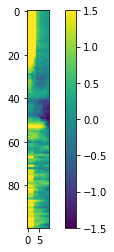

In [32]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

### Logistic regression with no regularization

In [34]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'

timewindow = 10



Train loss for epoch 0: 0.533683717250824
Val loss for epoch 0: 0.5638496279716492
Train loss for epoch 1: 0.5157580375671387
Val loss for epoch 1: 0.556925892829895
1
Train loss for epoch 2: 0.5097581744194031
Val loss for epoch 2: 0.5792186260223389
Train loss for epoch 3: 0.5065203905105591
Val loss for epoch 3: 0.5288152098655701
3
Train loss for epoch 4: 0.5047428011894226
Val loss for epoch 4: 0.5626770257949829
Train loss for epoch 5: 0.5033968687057495
Val loss for epoch 5: 0.5783944725990295
Train loss for epoch 6: 0.5028330087661743
Val loss for epoch 6: 0.552184522151947
Train loss for epoch 7: 0.5014469027519226
Val loss for epoch 7: 0.5564299821853638
Train loss for epoch 8: 0.5010576248168945
Val loss for epoch 8: 0.5306280851364136
Train loss for epoch 9: 0.5008028149604797
Val loss for epoch 9: 0.5320851802825928
Train loss for epoch 10: 0.5007649064064026
Val loss for epoch 10: 0.5677530765533447
Train loss for epoch 11: 0.5005989670753479
Val loss for epoch 11: 0.5809

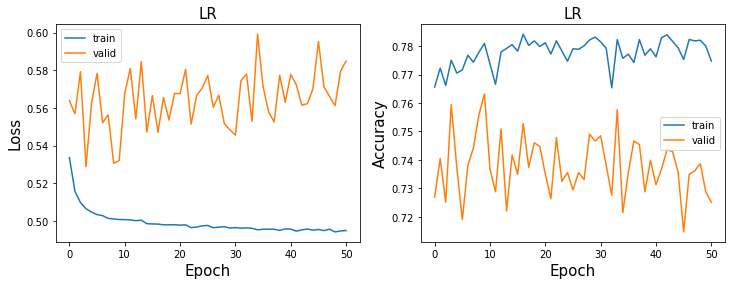

In [36]:

model = GLM(input_dim=100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)

    if train_loss < tol:
        break
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) 

In [46]:
best_epoch = 3

/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_2/LR_models/LR_CH23_LOSSbce_REGnone0_EPOCH3_REDUCEsum.pt


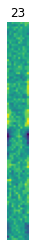

validation loss:0.5288152098655701 accuracy:0.7595092024539877
0.5
test loss:0.5066753625869751 accuracy:0.7692307692307693
0.82114595


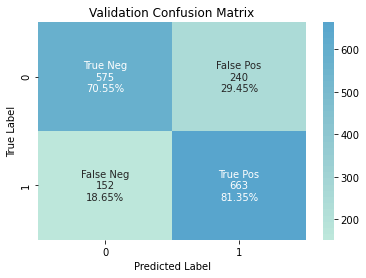

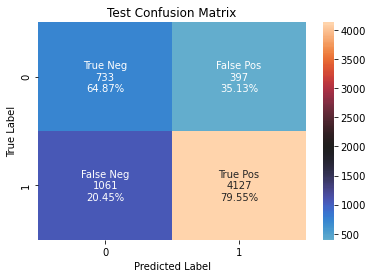

date:180711, rec:006, time:1802.0, label:1.0
Original data 62 CH


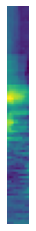

In [49]:


path = model_saving_path
best_epoch =  best_epoch
alpha = 0


# load best model
model = GLM(input_dim=100*10).to(device)
path = model_saving_path
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))

print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

## Show one feature
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

## Calculate validation accuracy and validation loss
val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
print(np.mean(np.concatenate(val_labels)))

## Calculate test accuracy and test loss
test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
print(np.mean(np.concatenate(test_labels)))

## Confusion matrix-validation
predictions_val = np.concatenate(val_preds)
labels_val = np.concatenate(val_labels)

df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

cm_val = confusion_matrix(labels_val, predictions_val)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_val.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
ax.set_title('Validation Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

## Confusion matrix-test
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

## Wrong Classifications
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_1[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

### Logistic regression with L2 regularization

In [50]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'
CH = 23

model = GLM(100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

Train loss for epoch 0: 0.5371860265731812
Val loss for epoch 0: 0.5672149062156677
Train loss for epoch 1: 0.5196148753166199
Val loss for epoch 1: 0.5225435495376587
1
Train loss for epoch 2: 0.5123425126075745
Val loss for epoch 2: 0.545915961265564
Train loss for epoch 3: 0.510320246219635
Val loss for epoch 3: 0.5284842252731323
Train loss for epoch 4: 0.5086853504180908
Val loss for epoch 4: 0.5428982973098755
Train loss for epoch 5: 0.5079661011695862
Val loss for epoch 5: 0.5716313123703003
Train loss for epoch 6: 0.5067034363746643
Val loss for epoch 6: 0.5621030926704407
Train loss for epoch 7: 0.5064793229103088
Val loss for epoch 7: 0.5557553768157959
Train loss for epoch 8: 0.5067301988601685
Val loss for epoch 8: 0.5569807887077332
Train loss for epoch 9: 0.5062461495399475
Val loss for epoch 9: 0.5700833201408386
Train loss for epoch 10: 0.5059741139411926
Val loss for epoch 10: 0.5560697317123413
Train loss for epoch 11: 0.5054795145988464
Val loss for epoch 11: 0.55388

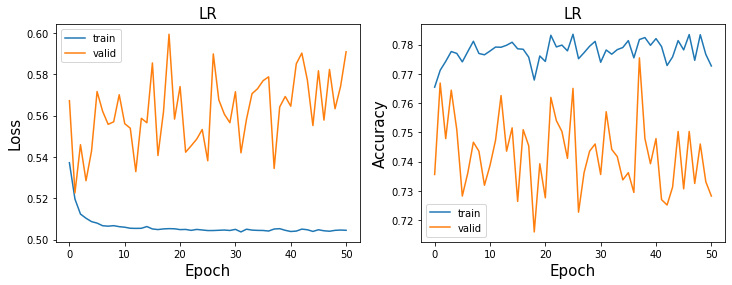

Train loss for epoch 0: 0.6029295921325684
Val loss for epoch 0: 0.5938007831573486
Train loss for epoch 1: 0.5787274241447449
Val loss for epoch 1: 0.5774064660072327
1
Train loss for epoch 2: 0.5775707960128784
Val loss for epoch 2: 0.561838686466217
2
Train loss for epoch 3: 0.5772528648376465
Val loss for epoch 3: 0.5668113231658936
Train loss for epoch 4: 0.5765151381492615
Val loss for epoch 4: 0.5696462988853455
Train loss for epoch 5: 0.5767492055892944
Val loss for epoch 5: 0.5696041584014893
Train loss for epoch 6: 0.5768108367919922
Val loss for epoch 6: 0.5702028870582581
Train loss for epoch 7: 0.5762560367584229
Val loss for epoch 7: 0.576755940914154
Train loss for epoch 8: 0.5770084261894226
Val loss for epoch 8: 0.5498009324073792
8
Train loss for epoch 9: 0.5764159560203552
Val loss for epoch 9: 0.569777250289917
Train loss for epoch 10: 0.5769853591918945
Val loss for epoch 10: 0.5638103485107422
Train loss for epoch 11: 0.5766915678977966
Val loss for epoch 11: 0.59

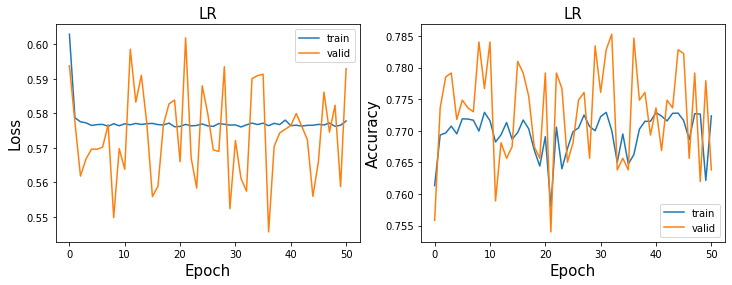

Train loss for epoch 0: 0.6414490342140198
Val loss for epoch 0: 0.6277262568473816
Train loss for epoch 1: 0.613726794719696
Val loss for epoch 1: 0.5865947008132935
1
Train loss for epoch 2: 0.6129092574119568
Val loss for epoch 2: 0.6142323613166809
Train loss for epoch 3: 0.6127499938011169
Val loss for epoch 3: 0.5813143253326416
3
Train loss for epoch 4: 0.6127045154571533
Val loss for epoch 4: 0.594161868095398
Train loss for epoch 5: 0.6131025552749634
Val loss for epoch 5: 0.5960150957107544
Train loss for epoch 6: 0.6130669116973877
Val loss for epoch 6: 0.5903042554855347
Train loss for epoch 7: 0.6128020286560059
Val loss for epoch 7: 0.6059078574180603
Train loss for epoch 8: 0.6125845313072205
Val loss for epoch 8: 0.6063622832298279
Train loss for epoch 9: 0.612423837184906
Val loss for epoch 9: 0.5913860201835632
Train loss for epoch 10: 0.6134189367294312
Val loss for epoch 10: 0.6112704277038574
Train loss for epoch 11: 0.6131044626235962
Val loss for epoch 11: 0.5788

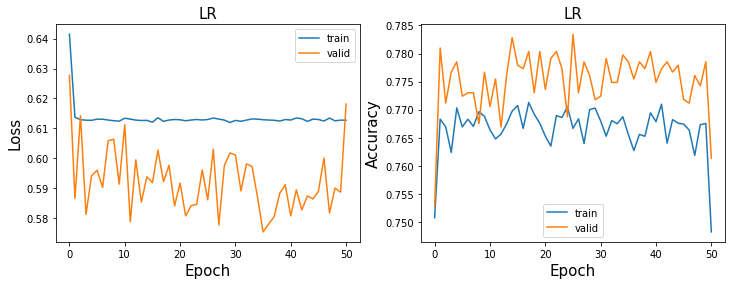

In [52]:
for alpha in alphas:
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []
    model = GLM(100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # reduction = 'sum', Goose_1st_2

In [53]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [1,50,100]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CH23_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1          1
50        36
100       35


/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_2/LR_models/LR_CH23_LOSSbce_REGl21_EPOCH1_REDUCEsum_valbalanced.pt


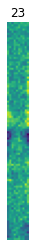

validation loss:0.5225435495376587 accuracy:0.7668711656441718
0.5
test loss:0.5376297831535339 accuracy:0.7557771446660335
0.82114595


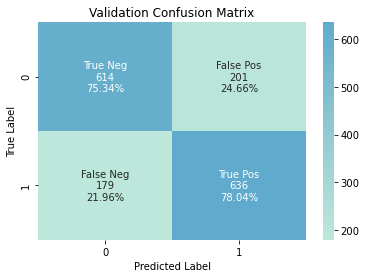

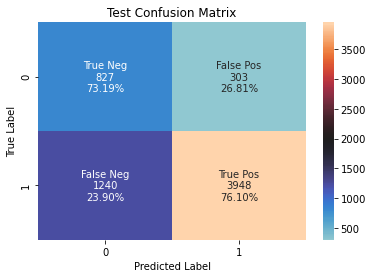

date:180711, rec:006, time:1802.0, label:1.0
Original data 62 CH


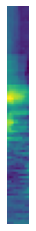

/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_2/LR_models/LR_CH23_LOSSbce_REGl250_EPOCH36_REDUCEsum_valbalanced.pt


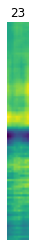

validation loss:0.5456559062004089 accuracy:0.7846625766871166
0.5
test loss:0.554864227771759 accuracy:0.7776194998417221
0.82114595


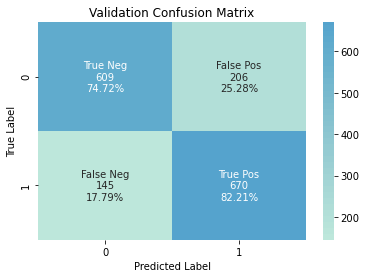

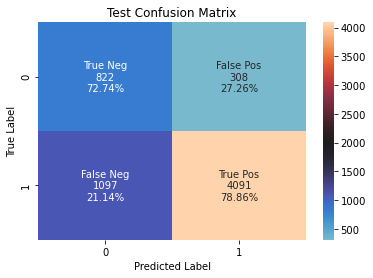

date:180711, rec:006, time:1802.0, label:1.0
Original data 62 CH


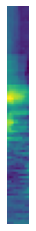

/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_2/LR_models/LR_CH23_LOSSbce_REGl2100_EPOCH35_REDUCEsum_valbalanced.pt


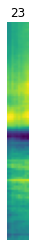

validation loss:0.5754415988922119 accuracy:0.7785276073619631
0.5
test loss:0.5854979753494263 accuracy:0.7828426717315606
0.82114595


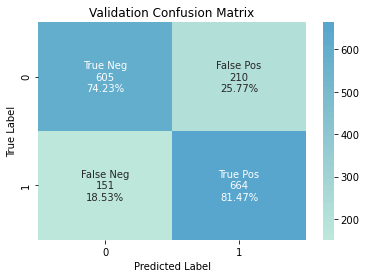

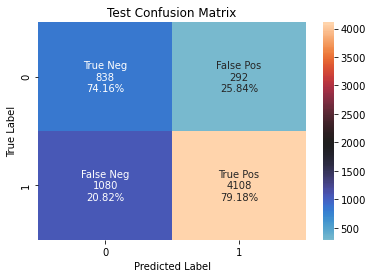

date:171023, rec:005, time:7132.0, label:1.0
Original data 62 CH


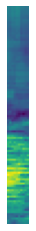

In [54]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, 10)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### Logistic Regression with finite difference regularization

In [55]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
CH = 23
timewindow = 10

Train loss for epoch 0: 0.5400927066802979
Val loss for epoch 0: 0.5727631449699402
Train loss for epoch 1: 0.5203290581703186
Val loss for epoch 1: 0.5490116477012634
1
Train loss for epoch 2: 0.5137890577316284
Val loss for epoch 2: 0.5495854616165161
Train loss for epoch 3: 0.5115963816642761
Val loss for epoch 3: 0.5167760848999023
3
Train loss for epoch 4: 0.5096327662467957
Val loss for epoch 4: 0.5734720826148987
Train loss for epoch 5: 0.5096246600151062
Val loss for epoch 5: 0.5316606760025024
Train loss for epoch 6: 0.5093165636062622
Val loss for epoch 6: 0.5854478478431702
Train loss for epoch 7: 0.5086381435394287
Val loss for epoch 7: 0.5625514388084412
Train loss for epoch 8: 0.5082074999809265
Val loss for epoch 8: 0.5687751770019531
Train loss for epoch 9: 0.5095862150192261
Val loss for epoch 9: 0.5817071795463562
Train loss for epoch 10: 0.5084617733955383
Val loss for epoch 10: 0.5819658041000366
Train loss for epoch 11: 0.5085000991821289
Val loss for epoch 11: 0.5

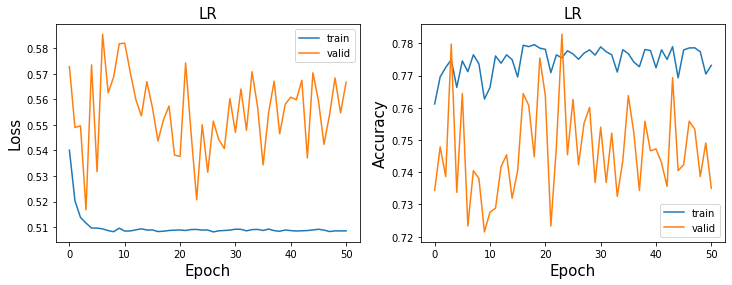

Train loss for epoch 0: 0.5872363448143005
Val loss for epoch 0: 0.5468345284461975
Train loss for epoch 1: 0.5468457341194153
Val loss for epoch 1: 0.5516637563705444
Train loss for epoch 2: 0.5446971654891968
Val loss for epoch 2: 0.5403168797492981
2
Train loss for epoch 3: 0.5438109040260315
Val loss for epoch 3: 0.5553217530250549
Train loss for epoch 4: 0.543656587600708
Val loss for epoch 4: 0.5468074679374695
Train loss for epoch 5: 0.5431029200553894
Val loss for epoch 5: 0.5467871427536011
Train loss for epoch 6: 0.5433667898178101
Val loss for epoch 6: 0.5335640907287598
6
Train loss for epoch 7: 0.5435515642166138
Val loss for epoch 7: 0.5526279807090759
Train loss for epoch 8: 0.5444061160087585
Val loss for epoch 8: 0.5517382621765137
Train loss for epoch 9: 0.5433540940284729
Val loss for epoch 9: 0.5313532948493958
9
Train loss for epoch 10: 0.5435231924057007
Val loss for epoch 10: 0.5356579422950745
Train loss for epoch 11: 0.5437061786651611
Val loss for epoch 11: 0.

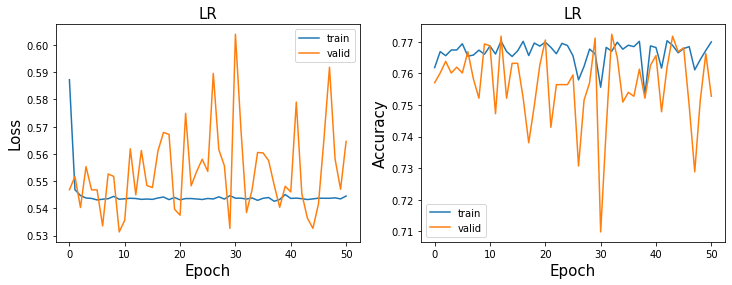

Train loss for epoch 0: 0.6153411865234375
Val loss for epoch 0: 0.5515013337135315
Train loss for epoch 1: 0.5598778128623962
Val loss for epoch 1: 0.5602422952651978
Train loss for epoch 2: 0.5585803985595703
Val loss for epoch 2: 0.5444923639297485
2
Train loss for epoch 3: 0.5586994290351868
Val loss for epoch 3: 0.5599108934402466
Train loss for epoch 4: 0.5590609908103943
Val loss for epoch 4: 0.5568066835403442
Train loss for epoch 5: 0.5575130581855774
Val loss for epoch 5: 0.5335535407066345
5
Train loss for epoch 6: 0.5579378008842468
Val loss for epoch 6: 0.581291675567627
Train loss for epoch 7: 0.5586901903152466
Val loss for epoch 7: 0.5673201084136963
Train loss for epoch 8: 0.5578144192695618
Val loss for epoch 8: 0.5356956124305725
Train loss for epoch 9: 0.5579383969306946
Val loss for epoch 9: 0.5390315055847168
Train loss for epoch 10: 0.5589662194252014
Val loss for epoch 10: 0.5521928668022156
Train loss for epoch 11: 0.558161735534668
Val loss for epoch 11: 0.548

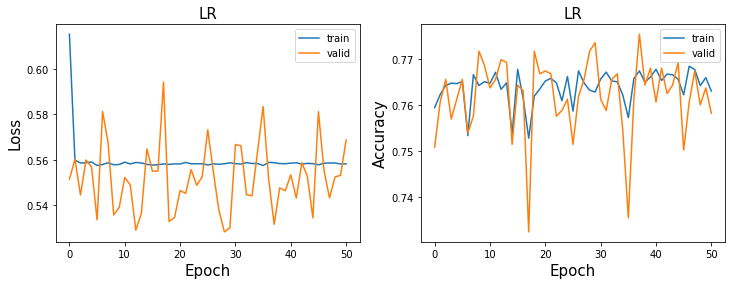

In [56]:
for alpha in alphas:
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []
    model = GLM(100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

In [57]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [1,50,100]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CH23_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1          3
50         9
100       28


/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff1_EPOCH3_REDUCEsum_valbalanced.pt


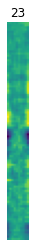

validation loss:0.5167760848999023 accuracy:0.7797546012269939
0.5
test loss:0.5134532451629639 accuracy:0.7706552706552706
0.82114595


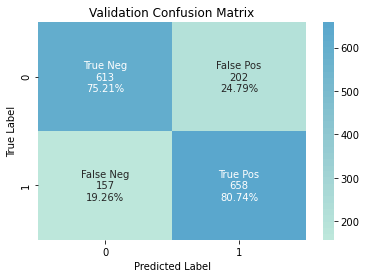

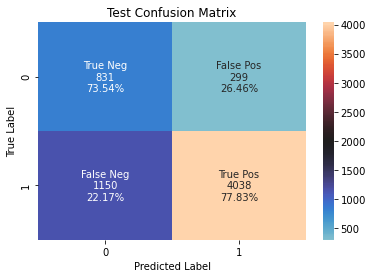

date:180711, rec:006, time:1802.0, label:1.0
Original data 62 CH


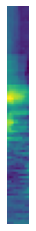

/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff50_EPOCH9_REDUCEsum_valbalanced.pt


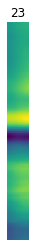

validation loss:0.5313532948493958 accuracy:0.7693251533742331
0.5
test loss:0.5312011241912842 accuracy:0.768281101614435
0.82114595


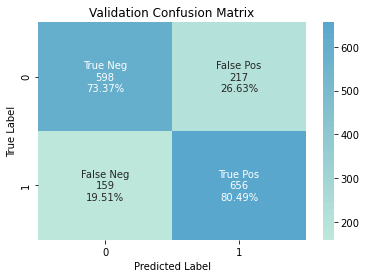

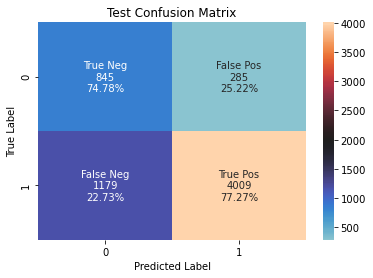

date:180711, rec:006, time:1802.0, label:1.0
Original data 62 CH


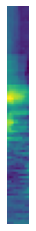

/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff100_EPOCH28_REDUCEsum_valbalanced.pt


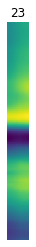

validation loss:0.5282137393951416 accuracy:0.7717791411042945
0.5
test loss:0.5391302704811096 accuracy:0.7720797720797721
0.82114595


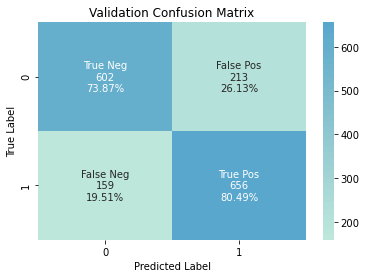

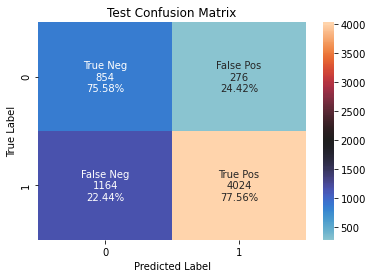

date:180711, rec:006, time:1802.0, label:1.0
Original data 62 CH


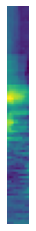

In [58]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, 10)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### SVM without regularization

In [22]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0 
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'none' # expect to be bad, since predictions could be arbitrarily far from boundaries
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [13]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6105479598045349
Val loss for epoch 0: 1.2834664583206177
Train loss for epoch 1: 0.5602447986602783
Val loss for epoch 1: 0.9178999662399292
1
Train loss for epoch 2: 0.4674215018749237
Val loss for epoch 2: 3.1678149700164795
Train loss for epoch 3: 0.5240594744682312
Val loss for epoch 3: 0.9516066312789917
Train loss for epoch 4: 0.4172993004322052
Val loss for epoch 4: 1.5819454193115234
Train loss for epoch 5: 0.4704030156135559
Val loss for epoch 5: 1.1257431507110596
Train loss for epoch 6: 0.3469279408454895
Val loss for epoch 6: 1.4243940114974976
Train loss for epoch 7: 0.3866455554962158
Val loss for epoch 7: 1.1779205799102783
Train loss for epoch 8: 0.33019065856933594
Val loss for epoch 8: 1.365188479423523
Train loss for epoch 9: 0.3815663754940033
Val loss for epoch 9: 1.5121104717254639
Train loss for epoch 10: 0.40764206647872925
Val loss for epoch 10: 1.7473173141479492
Train loss for epoch 11: 0.3409585654735565
Val loss for epoch 11: 1.27

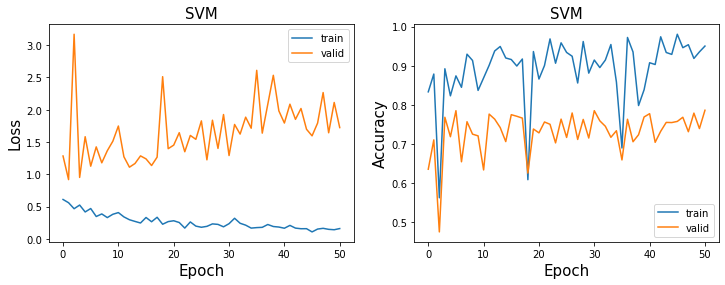

In [14]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [23]:
best_epoch = 1

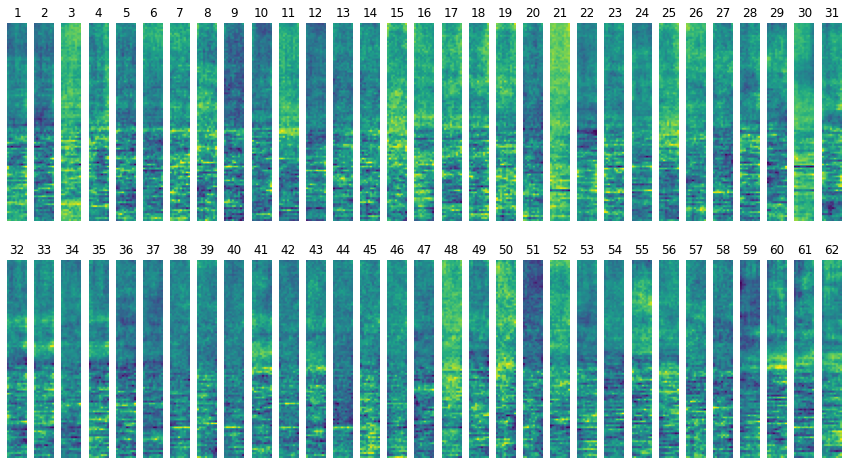

In [24]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [27]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_3 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7428555488586426 accuracy:0.7838461538461539


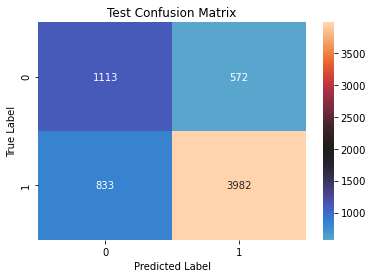

In [28]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


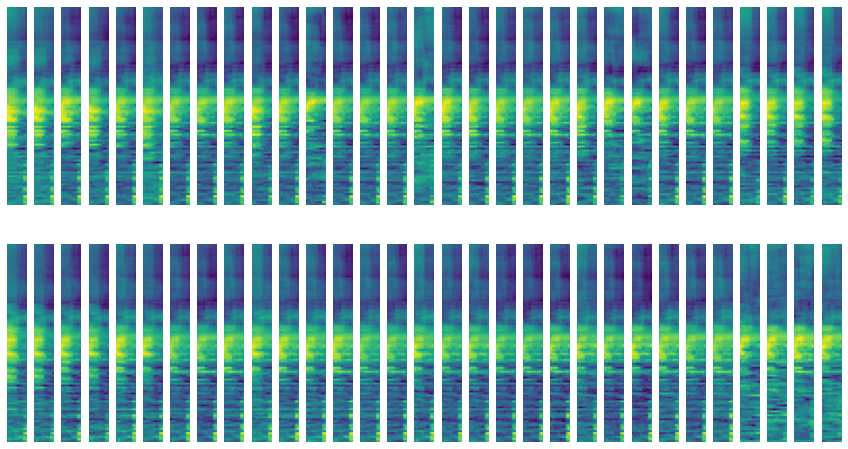

In [30]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_3[0][0], cases_wrong_3[0][1], cases_wrong_3[0][1], cases_wrong_3[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_3[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with L2 regularization

In [31]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5 # have special meaning as margin, corresponding to 1 in the hinge loss
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [16]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.142331600189209
Val loss for epoch 0: 2.375016927719116
Train loss for epoch 1: 0.8872479200363159
Val loss for epoch 1: 0.9689788222312927
1
Train loss for epoch 2: 0.9464882612228394
Val loss for epoch 2: 1.0704563856124878
Train loss for epoch 3: 0.8319297432899475
Val loss for epoch 3: 1.3819953203201294
Train loss for epoch 4: 0.9815953969955444
Val loss for epoch 4: 2.2135136127471924
Train loss for epoch 5: 0.9559652209281921
Val loss for epoch 5: 1.3571209907531738
Train loss for epoch 6: 0.9480046629905701
Val loss for epoch 6: 0.958657443523407
6
Train loss for epoch 7: 0.8747104406356812
Val loss for epoch 7: 1.0527974367141724
Train loss for epoch 8: 0.938942551612854
Val loss for epoch 8: 1.816292405128479
Train loss for epoch 9: 1.033324956893921
Val loss for epoch 9: 1.2031350135803223
Train loss for epoch 10: 0.908989667892456
Val loss for epoch 10: 0.6989802718162537
10
Train loss for epoch 11: 0.9314482808113098
Val loss for epoch 11: 1.08010

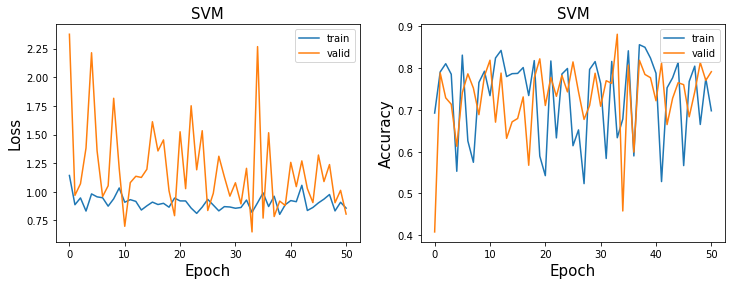

In [17]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [32]:
best_epoch = 33

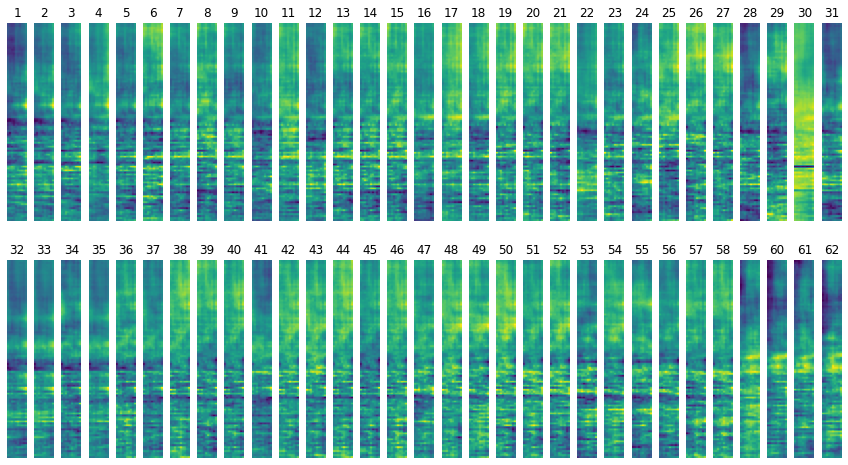

In [33]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [34]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:1.2684636116027832 accuracy:0.7512307692307693


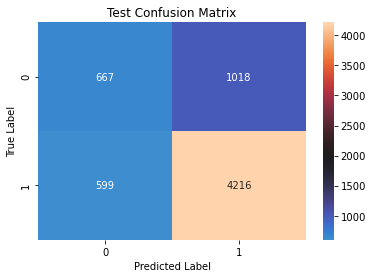

In [35]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


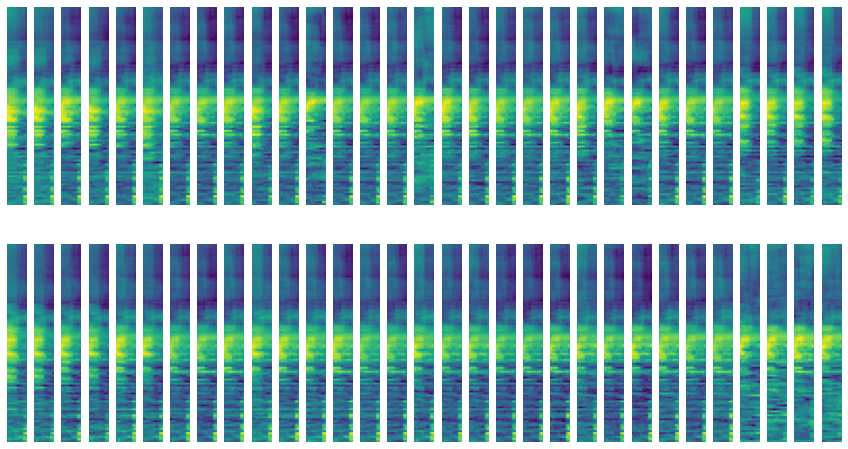

In [36]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_4[0][0], cases_wrong_4[0][1], cases_wrong_4[0][1], cases_wrong_4[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_4[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with finite difference regularization

In [37]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [19]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.1333791017532349
Val loss for epoch 0: 1.699452519416809
Train loss for epoch 1: 0.7799455523490906
Val loss for epoch 1: 1.1568527221679688
1
Train loss for epoch 2: 0.8088831305503845
Val loss for epoch 2: 1.5023279190063477
Train loss for epoch 3: 0.7681555151939392
Val loss for epoch 3: 1.125550389289856
3
Train loss for epoch 4: 0.779151201248169
Val loss for epoch 4: 0.9314382076263428
4
Train loss for epoch 5: 0.6864786744117737
Val loss for epoch 5: 1.0832509994506836
Train loss for epoch 6: 0.6971858739852905
Val loss for epoch 6: 1.0215011835098267
Train loss for epoch 7: 0.7639809250831604
Val loss for epoch 7: 1.7163935899734497
Train loss for epoch 8: 0.7523619532585144
Val loss for epoch 8: 1.3559271097183228
Train loss for epoch 9: 0.837641179561615
Val loss for epoch 9: 1.0237863063812256
Train loss for epoch 10: 0.7160231471061707
Val loss for epoch 10: 1.128845453262329
Train loss for epoch 11: 0.7040753364562988
Val loss for epoch 11: 3.2867

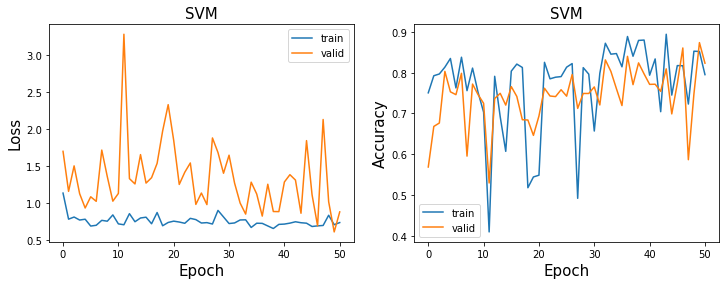

In [20]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [38]:
best_epoch = 49

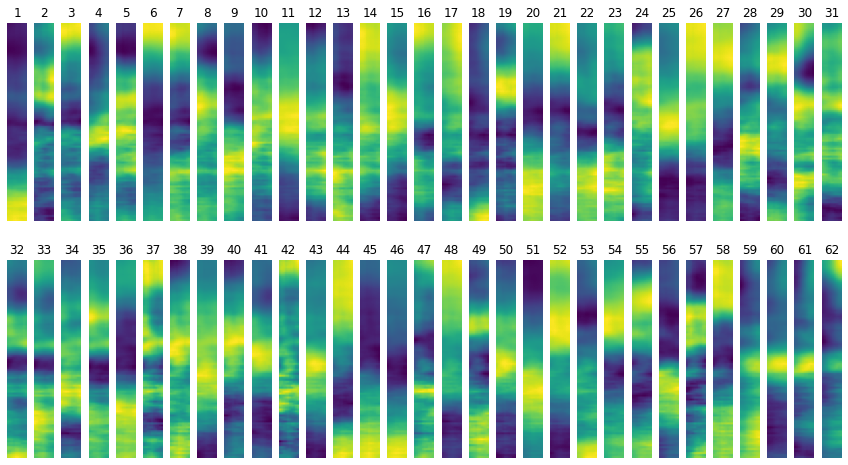

In [39]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [40]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.8956817984580994 accuracy:0.8355384615384616


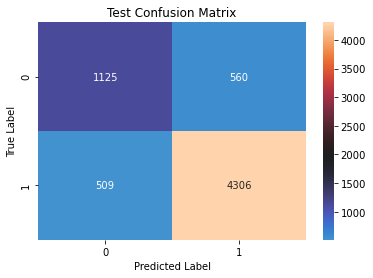

In [41]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


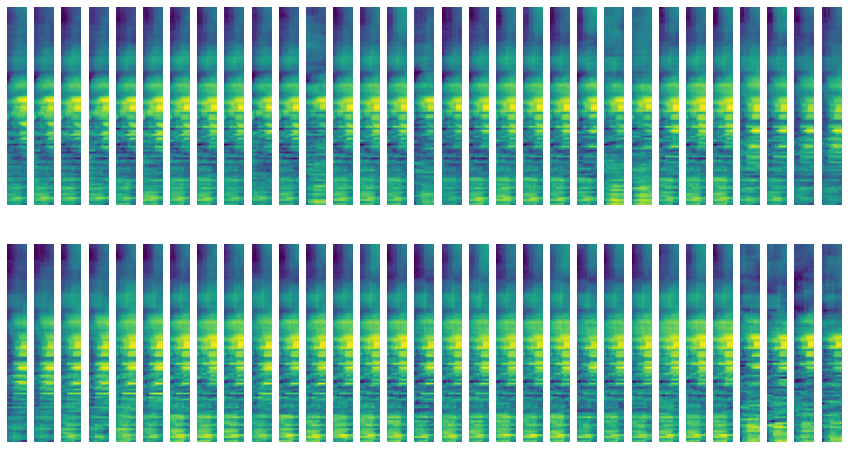

In [42]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_5[0][0], cases_wrong_5[0][1], cases_wrong_5[0][1], cases_wrong_5[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_5[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()